In [15]:
!python ../train.py --img 320 --batch 16 --epochs 3 --data data.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=../data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with git@github.com:mjaber95/FeedMe ✅
YOLOv5 🚀 0.4-16-g2832e85 Python-3.8.13 torch-1.11.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

In [14]:
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/mamdouhjaber/code/mjaber95/FeedMe/YOLOv5_model/best.pt')

Using cache found in /Users/mamdouhjaber/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-23 Python-3.8.13 torch-1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [3]:
img = '/Users/mamdouhjaber/Downloads/open-refrigerator-full-fresh-food-products-fridge-groceries-123057336.jpg'

In [4]:
results = model(img)

In [5]:
results.show()

In [28]:
results.pandas().xyxy[0]["name"].unique()

array(['onion', 'spinach', 'green_beans', 'milk', 'apple', 'tomato', 'potato', 'sugar', 'butter', 'lime', 'carrot'], dtype=object)

In [10]:
output_list = results.pandas().xyxy[0]["name"].unique()

In [20]:
ing_list = ["apple",
 "banana",
 "beef",
 "blueberry",
 "bread",
 "butter",
 "carrot",
 "cheese",
 "chicken",
 "chocolate",
 "corn",
 "egg",
 "flour",
 "bean",
 "ham",
 "cream",
 "lime",
 "milk",
 "mushroom",
 "onion",
 "potato",
 "shrimp",
 "spinach",
 "strawberry",
 "sugar",
 "tomato"]

In [9]:
len(ing_list)

26

In [23]:
ing_list

['apple',
 'banana',
 'beef',
 'blueberry',
 'bread',
 'butter',
 'carrot',
 'cheese',
 'chicken',
 'chocolate',
 'corn',
 'egg',
 'flour',
 'bean',
 'ham',
 'cream',
 'lime',
 'milk',
 'mushroom',
 'onion',
 'potato',
 'shrimp',
 'spinach',
 'strawberry',
 'sugar',
 'tomato']

In [29]:
def vector_output(list_1):
    V = ing_list.copy()
    for i, ing in enumerate(V):
        if ing in list_1:
            V[i] = 1
        else:
            V[i] = 0
    return V
            

In [30]:
vector_output(output_list)

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

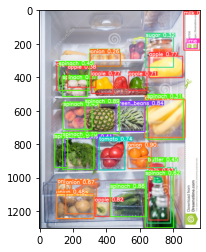

In [26]:
plt.imshow(results.imgs[0])
plt.show()

In [29]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,528.160156,815.940125,668.911865,944.641846,0.901089,22,onion
1,273.713409,555.194092,478.721466,734.697144,0.886956,25,spinach
2,423.287720,1061.073364,637.906982,1232.827026,0.855483,25,spinach
3,457.152588,567.510437,630.593994,724.372925,0.843372,15,green_beans
4,860.465576,2.603244,956.115601,239.290955,0.823619,20,milk
5,332.189667,1142.455444,419.427124,1230.857178,0.821672,0,apple
6,654.526123,275.104797,853.604614,403.496368,0.773160,0,apple
7,313.643066,390.579956,443.487701,497.626984,0.766405,0,apple
8,357.599335,780.816528,510.524658,953.700623,0.735910,29,tomato
9,532.114319,391.296844,641.722839,480.768341,0.705026,0,apple
